# Thesis work

## imports

In [1]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itables import show
import pprint

import itertools
from multiprocess import Pool
import multiprocess
from multiprocess import Manager
from threading import Thread

import os
from tqdm import tqdm
from tqdm.contrib.concurrent import process_map  # or thread_map
import numpy as np
from scipy.interpolate import interp1d
# from scipy.optimize import UnivariateSpline
from scipy.interpolate import interp1d, UnivariateSpline
import matplotlib.pyplot as plt
from astropy.io import fits
from FitsClass import FITSFile as myfits
from ObservationClass import ObservationManager as obsm

import specs as specs
from CCF import CCFclass

# Orginazing 2D star fits files

In [2]:
obs = obsm()
# obs.organize_star_2D_images(f'../RawData/archive')

In [11]:
path = f'../RawData/archive/ADP.2020-11-13T12:33:07.692.fits'
fit = myfits(path)
data = fit.data
image_data = fits.getdata(path, ext=0)

In [12]:
image_data

array([[-541.86664  , -268.81192  , 2001.8967   , ...,   13.63808  ,
          52.699177 ,   28.331072 ],
       [-202.36807  ,  550.6139   ,  139.13632  , ...,  -12.680979 ,
         -28.001728 ,   -7.966964 ],
       [-192.87576  ,  474.86603  ,  320.04724  , ...,  -18.424162 ,
          15.039984 ,   29.270485 ],
       ...,
       [ 309.92532  ,  317.94766  ,   92.83809  , ...,   -8.947825 ,
          -4.6025643,   16.124666 ],
       [-690.5028   ,  132.07367  ,  439.33838  , ...,    7.489552 ,
         -13.025372 ,   -5.767559 ],
       [-187.88748  , -173.53964  ,   62.862427 , ...,  -11.4056015,
          21.270926 ,  -16.842594 ]], dtype='>f4')

In [13]:
fit.print_file_info()

Opened FITS file: ../RawData/archive/ADP.2020-11-13T12:33:07.692.fits
Number of HDUs: 3
HDU 0: PrimaryHDU
------------------------------------------------------------
Header:
SIMPLE = True
BITPIX = -32
NAXIS = 2
NAXIS1 = 12854
NAXIS2 = 99
EXTEND = True
COMMENT =   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT =   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
DATE = 2020-11-12T12:45:11
LAMNLIN = 3310
LAMRMS = 0.0034449051386803
CRDER1 = 5.98774463754332e-05
CSYER1 = 0.03
CUNIT1 = nm
SPATRMS = 0.0102419914646424
CRDER2 = 0.000178020662402537
CSYER2 = 0.17
CUNIT2 = arcsec
CRPIX1 = 1.0
CRVAL1 = 298.92
CDELT1 = 0.02
CTYPE1 = LINEAR
CRPIX2 = 1.0
CRVAL2 = -10.2600002288818
CDELT2 = 0.16
CTYPE2 = LINEAR
CD1_1 = 0.02
CD1_2 = 0.0
CD2_1 = 0.0
CD2_2 = 0.16
ORIGIN = ESO
TELESCOP = ESO-VLT-U3
INSTRUME = XSHOOTER
OBJECT = Brey  70a
RA = 84.397331
DEC = -69.14351
EQUINOX = 2000.0
RADECSYS = FK5
EXPTIME = 1357.0
MJD-OBS = 59144.319757056
DATE-OBS

In [5]:
count = 0
for star_name in specs.star_names:
    print(f'Number {count}: is {star_name}')
    count += 1

Number 0: is Brey  70
Number 1: is Brey  83
Number 2: is HD  38029
Number 3: is HD  37248
Number 4: is Brey  95a
Number 5: is MNM2014 LMC195-1
Number 6: is HD  32125
Number 7: is HD  37026
Number 8: is HD 269818
Number 9: is HD  38448
Number 10: is HD  38030
Number 11: is HD  37680
Number 12: is Brey  58a
Number 13: is HD  32228
Number 14: is HD  32257
Number 15: is HD 269888
Number 16: is HD  36156
Number 17: is H2013 LMCe  584
Number 18: is RMC 140
Number 19: is HD  32402
Number 20: is Brey  70a
Number 21: is Brey  16a
Number 22: is Brey  93
Number 23: is Brey  90a
Number 24: is HD 269891


# Load 2D images data

In [4]:
# path = f'Data/Brey  70/epoch1/
obs = obsm()
star_name = specs.star_names[16]
star = obs.load_star_instance(star_name)
file = star.load_2D_observation(1,'UVB')
raw_data = file.raw_data

Data/HD  36156/epoch1/UVB/2D image/ADP.2020-11-13T11:44:23.948.fits
Data loaded from Data/HD  36156/epoch1/UVB/2D image/ADP.2020-11-13T11:44:23.948.fits


## Plot 2D image

Data/HD  36156/epoch1/VIS/ADP.2020-11-13T11_44_23.904.fits
Data loaded from Data/HD  36156/epoch1/VIS/ADP.2020-11-13T11_44_23.904.fits
Data/HD  36156/epoch1/VIS/2D image/ADP.2020-11-13T11:44:23.905.fits
Data loaded from Data/HD  36156/epoch1/VIS/2D image/ADP.2020-11-13T11:44:23.905.fits
see all
spacial axis has 99 items


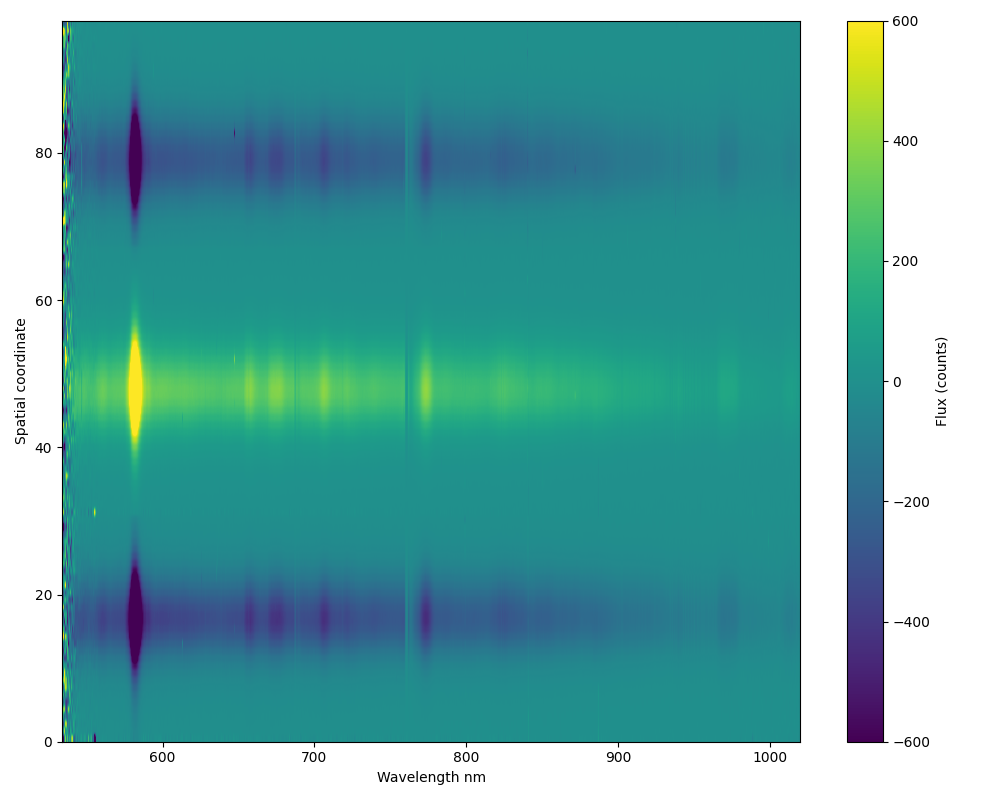

In [5]:
%matplotlib widget
star.plot_2D_image(1,'VIS',ValMax=600, ValMin=-600,norm = False)

In [24]:
star.plot_2D_image(6,'UVB',ValMin=-600,ValMax=600)

Data/H2013 LMCe  584/epoch6/UVB/ADP.2021-11-19T09_03_44.903.fits
Data loaded from Data/H2013 LMCe  584/epoch6/UVB/ADP.2021-11-19T09_03_44.903.fits
Data/H2013 LMCe  584/epoch6/UVB/2D image/ADP.2021-11-19T09:03:44.904.fits
Error loading Data/H2013 LMCe  584/epoch6/UVB/2D image/ADP.2021-11-19T09:03:44.904.fits: [Errno 2] No such file or directory: 'Data/H2013 LMCe  584/epoch6/UVB/2D image/ADP.2021-11-19T09:03:44.904.fits'


TypeError: '>' not supported between instances of 'NoneType' and 'int'

Data/Brey  58a/epoch1/VIS/ADP.2020-12-15T09_04_22.589.fits
Data loaded from Data/Brey  58a/epoch1/VIS/ADP.2020-12-15T09_04_22.589.fits
Data/Brey  58a/epoch1/VIS/2D image/ADP.2020-12-15T09:04:22.590.fits
Data loaded from Data/Brey  58a/epoch1/VIS/2D image/ADP.2020-12-15T09:04:22.590.fits
spacial axis has 28 items


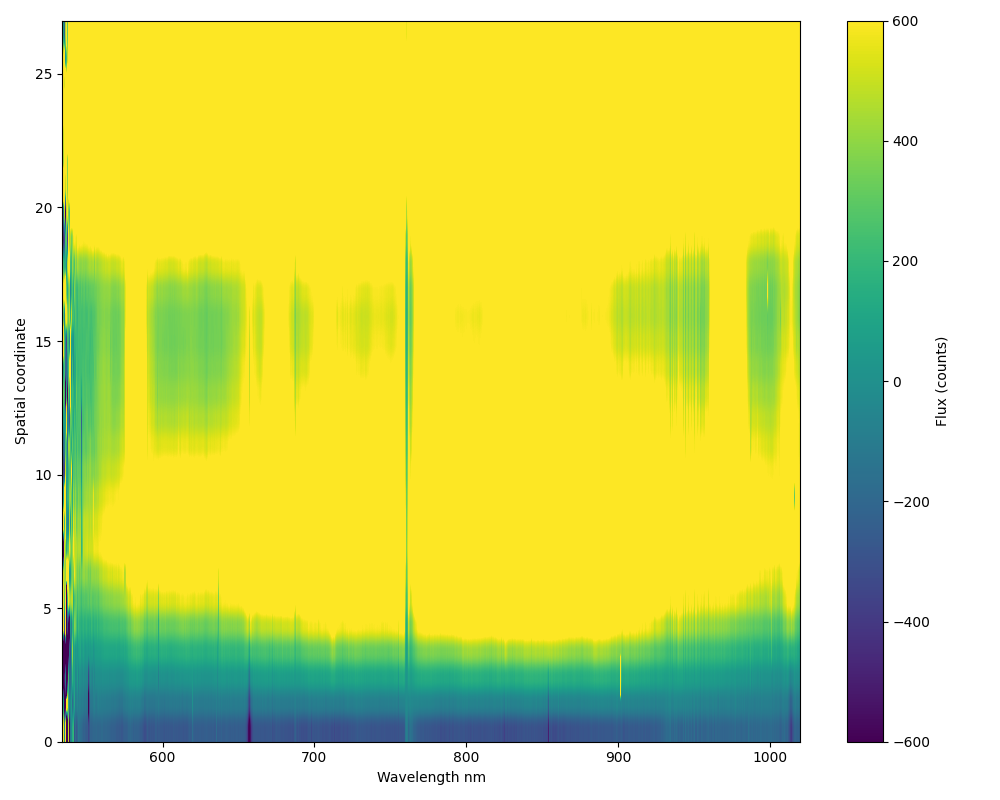

In [17]:
star.plot_2D_image(1,'VIS',ValMin=-600,ValMax=600)

Data/Brey  83/epoch1/NIR/ADP.2020-11-13T13_19_45.746.fits
Data loaded from Data/Brey  83/epoch1/NIR/ADP.2020-11-13T13_19_45.746.fits
Data/Brey  83/epoch1/NIR/2D image/ADP.2020-11-13T13:19:45.747.fits
Data loaded from Data/Brey  83/epoch1/NIR/2D image/ADP.2020-11-13T13:19:45.747.fits
spacial axis has 28 items


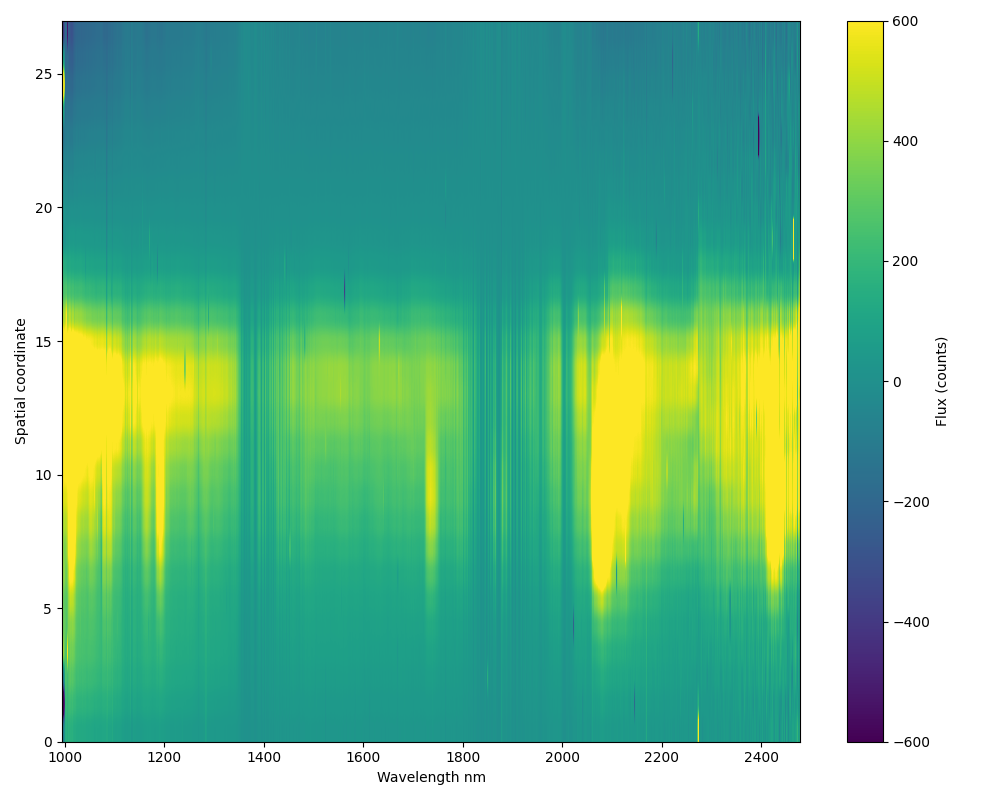

In [3]:
%matplotlib widget
star_name = specs.star_names[1]
star = obs.load_star_instance(star_name)
star.plot_2D_image(1,'NIR',ValMin=-600,ValMax=600)

In [61]:
fits_file = star.load_2D_observation(1,band = 'VIS')
spectra_fits_file = star.load_observation(1,'VIS')
print(fits_file.dataheader)

Data/RMC 140/epoch1/VIS/2D image/ADP.2020-11-13T13:47:10.407.fits
Data loaded from Data/RMC 140/epoch1/VIS/2D image/ADP.2020-11-13T13:47:10.407.fits
Data/RMC 140/epoch1/VIS/ADP.2020-11-13T13_47_10.406.fits
Data loaded from Data/RMC 140/epoch1/VIS/ADP.2020-11-13T13_47_10.406.fits
XTENSION= 'IMAGE   '           / IMAGE extension                                BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                24318 / length of data axis 1                          NAXIS2  =                   99 / length of data axis 2                          PCOUNT  =                    0 / required keyword; must = 0                     GCOUNT  =                    1 / required keyword; must = 1                     EXTNAME = 'ERRS    '                                                            BUNIT   = 'ADU     '                                                            

In [62]:
print(spectra_fits_file.dataheader)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =              1264536 / width of table in bytes                        NAXIS2  =                    1 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                    7 / number of fields in each row                   TTYPE1  = 'WAVE    '           / label for field   1                            TFORM1  = '24318D  '           / data format of field: 8-byte DOUBLE            TUNIT1  = 'nm      '           / physical unit of field                         TTYPE2  = 'FLUX    '           / label for field   2                            TFORM2  = '24318D  '           / data fo

# Plotting speatra

In [18]:
obs = obsm()
star_name = specs.star_names[17]
print(f'I am working on {star_name}')
star = obs.load_star_instance(star_name)

I am working on H2013 LMCe  584
BAT99 identifier not found. The indexes were: -1 and 39. It found sion="1.0" encoding="UTF-8" ?>


Data/HD  36156/epoch5/COMBINED/combined_bands.fits
Data loaded from Data/HD  36156/epoch5/COMBINED/combined_bands.fits


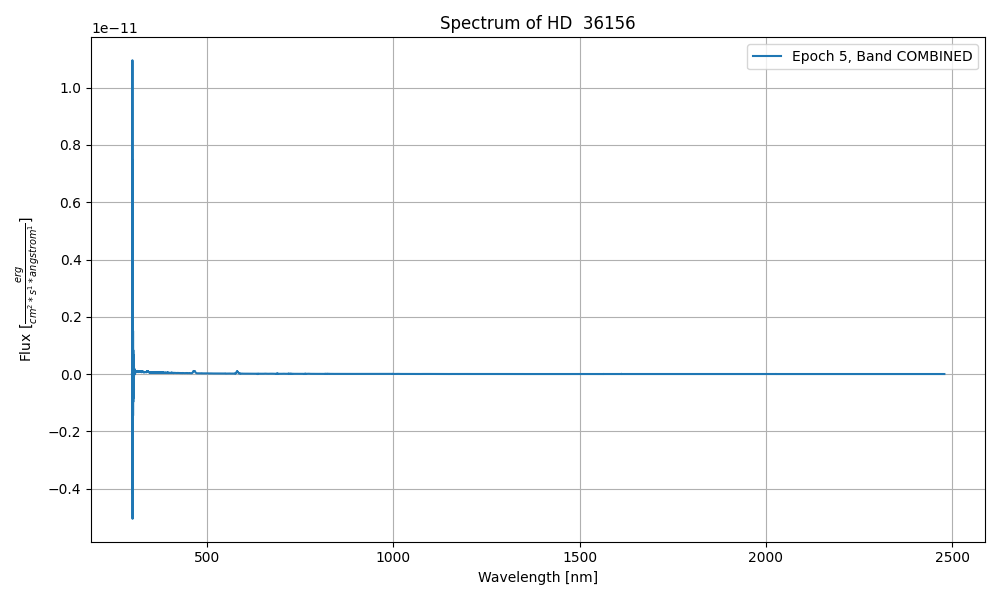

In [8]:
%matplotlib widget
star.plot_spectra(5,'COMBINED')
# star.plot_spectra(1,'UVB')

In [27]:
obs.create_observation_table_for_stars(stars = ['H2013 LMCe  584'])

BAT99 identifier not found. The indexes were: -1 and 39. It found sion="1.0" encoding="UTF-8" ?>


File Name     Band Mid-Exposure Date (TMID)
0                combined_bands.fits  Unknown                  Unknown
1                combined_bands.fits  Unknown                  Unknown
2   ADP.2021-01-11T12_13_25.974.fits      NIR             59187.337381
3   ADP.2021-01-11T12_13_26.069.fits      UVB             59187.337257
4   ADP.2021-01-11T12_13_26.123.fits      VIS             59187.337172
5                combined_bands.fits  Unknown                  Unknown
6                combined_bands.fits  Unknown                  Unknown
7   ADP.2021-01-11T12_54_49.790.fits      NIR             59205.154861
8   ADP.2021-01-11T12_54_49.690.fits      UVB             59205.154737
9   ADP.2021-01-11T12_54_49.731.fits      VIS             59205.154652
10               combined_bands.fits  Unknown                  Unknown
11               combined_bands.fits  Unknown                  Unknown
12  ADP.2021-04-22T19_37_54.054.fits      NIR             59312.002133
13  ADP.2021-04-22T19_37_53.844.fits      UVB             59312.002009
14  ADP.2021-04-22T19_37_53.860.fits      VIS             59312.001925
15               combined_bands.fits  Unknown                  Unknown
16               combined_bands.fits  Unknown                  Unknown
17  ADP.2021-05-10T09_27_27.941.fits      NIR             59334.026918
18  ADP.2021-05-10T09_27_27.883.fits      UVB             59334.026794
19  ADP.2021-05-10T09_27_27.961.fits      VIS              59334.02671
20               combined_bands.fits  Unknown                  Unknown
21               combined_bands.fits  Unknown                  Unknown
22  ADP.2021-11-05T09_31_37.520.fits      NIR             59510.217684
23  ADP.2021-11-05T09_31_37.451.fits      UVB             59510.217562
24  ADP.2021-11-05T09_31_37.459.fits      VIS             59510.217478
25               combined_bands.fits  Unknown                  Unknown
26               combined_bands.fits  Unknown                  Unknown
27  ADP.2021-11-19T09_03_44.971.fits      NIR             59530.346576
28  ADP.2021-11-19T09_03_44.903.fits      UVB             59530.346453
29  ADP.2021-11-19T09_03_44.912.fits      VIS             59530.346369

## Plotting normalizied spectra

/Users/guyshtainer/Library/CloudStorage/OneDrive-mail.tau.ac.il/תואר שני!/Thesis/Thesis-codes/StarClass.py:1002: RuntimeWarning: invalid value encountered in divide
  plt.plot(wavelengths, normalized_flux / normalized_flux, '--', label='Fitted Continuum (Normalized)', color='red')


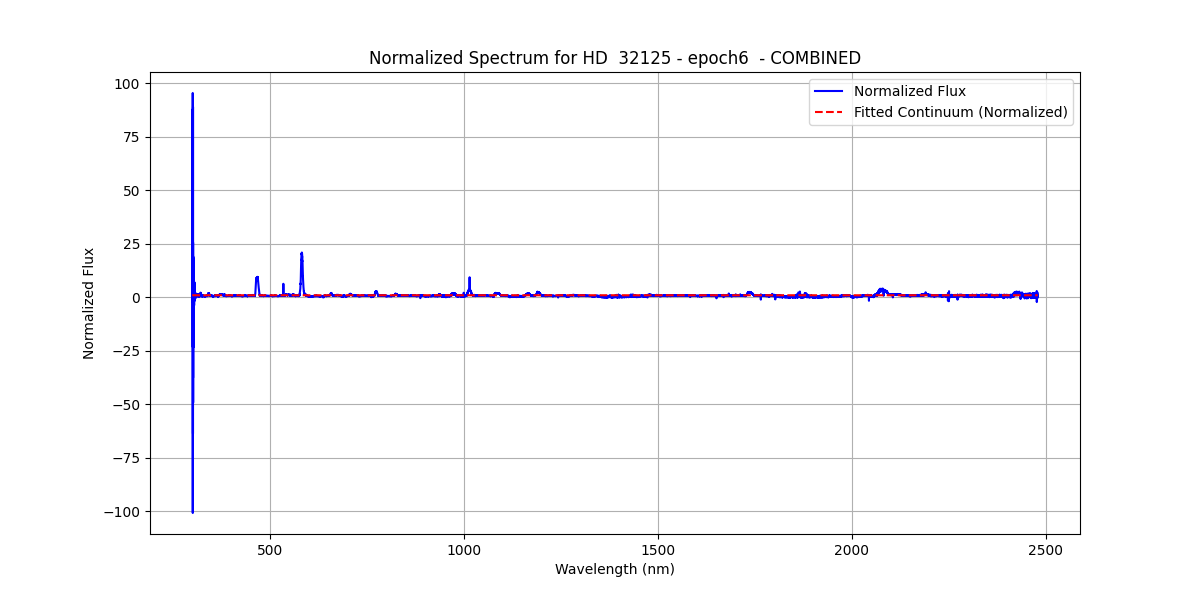

In [5]:
%matplotlib widget
# star_name = specs.star_names[0]
# star = obs.load_star_instance(star_name)
star.plot_normalized_spectrum(6,'COMBINED')

Data/HD  32125/epoch6/COMBINED/combined_bands.fits
Data loaded from Data/HD  32125/epoch6/COMBINED/combined_bands.fits


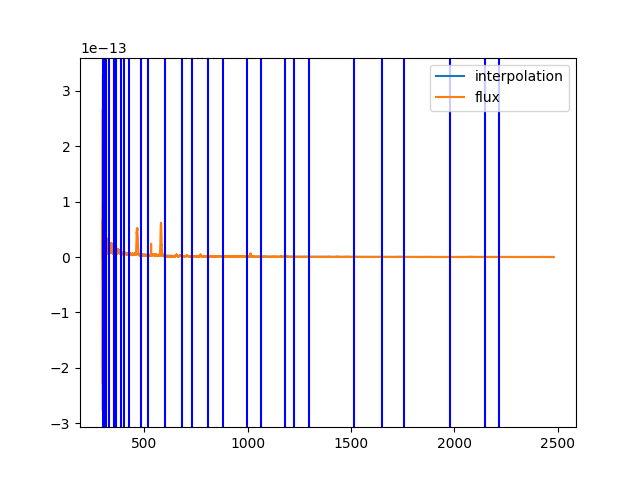

[ 298.92  309.46  317.26  330.8   352.54  365.72  386.52  400.24  429.06
  482.64  520.66  601.52  683.96  731.44  810.22  879.22  998.9  1066.8
 1180.32 1226.58 1295.7  1516.74 1651.26 1758.6  1981.14 2148.06 2216.16]


In [2]:
%matplotlib widget
obs = obsm()
star_name = specs.star_names[6]
star = obs.load_star_instance(star_name)
normalized_flux_tmp = star.load_property('normalized_flux',6,'COMBINED')
interpolated_flux_tmp = star.load_property('interpolated_flux',6,'COMBINED')
anchor_points_tmp = star.load_property('norm_anchor_wavelengths',6,'COMBINED')
# anchor_points = anchor_points_tmp['norm_anchor_wavelengths']
flux = star.load_observation(6,'COMBINED').data['FLUX'][0]
wavelengths = normalized_flux_tmp['wavelengths']
normalized_flux = normalized_flux_tmp['normalized_flux']
interpolated_flux = interpolated_flux_tmp['interpolated_flux']
plt.plot(wavelengths,interpolated_flux,label = 'interpolation')
plt.plot(wavelengths,flux,label = 'flux')
for wave in anchor_points_tmp:
    plt.axvline(x = wave, color = 'b')
# plt.scatter(
plt.legend()
plt.show()

print(anchor_points_tmp)
# print(normalized_flux)
# print(interpolated_flux)

# Loading property files for stars

In [4]:
obs = obsm()
star_name = specs.star_names[0]
star = obs.load_star_instance(star_name)
norm = star.load_property('normalized_flux',1,'COMBINED')
print(norm)
points = star.load_property('norm_anchor_wavelengths',1,'COMBINED')
print(points)

{'wavelengths': array([ 298.92,  298.94,  298.96, ..., 2478.84, 2478.9 , 2478.96],
      dtype='>f8'), 'normalized_flux': array([ 0.09609028, -0.05070256,  0.01819126, ...,  0.51625229,
        0.27221397,  0.        ])}
[ 309.52  317.76  332.42  350.58  364.2   387.58  398.84  404.9   412.8
  429.6   475.92  494.38  507.92  520.18  535.68  552.4   568.92  607.92
  631.68  667.96  695.46  714.22  750.68  809.56  849.8   860.22  876.46
  903.5   921.12  992.72 1044.06 1067.82 1103.7  1176.9  1222.8  1331.76
 1521.06 1651.62 1759.2  1985.46 2135.88 2259.66 2396.58 2468.88]


# Plotting the normalized flux when trying to take the 2D image and throw the top and bottom panes, sun along the vertical axis and normalized using what I chose for the 1D flux. And comparing to my normalization

In [12]:
obs = obsm()
star_name = specs.star_names[3]
star = obs.load_star_instance(star_name)
epoch_num = 5

In [17]:
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    print(f'for {star_name} its spectral type is: {star.spectral_type}')
    print(f'for {star_name} its BAT99  {star.BAT_ID}')

for Brey  70 its spectral type is: WR D
for Brey  70 its BAT99  87
for Brey  83 its spectral type is: WC4 C
for Brey  83 its BAT99  115
for HD  38029 its spectral type is: None
for HD  38029 its BAT99  85
for HD  37248 its spectral type is: WC4+O9 C
for HD  37248 its BAT99  53
for Brey  95a its spectral type is: G: E
for Brey  95a its BAT99  127
for MNM2014 LMC195-1 its spectral type is: WO2 C
for MNM2014 LMC195-1 its BAT99  None
for HD  32125 its spectral type is: WC C
for HD  32125 its BAT99  9
for HD  37026 its spectral type is: WC D
for HD  37026 its BAT99  52
for HD 269818 its spectral type is: WR D
for HD 269818 its BAT99  70
for HD  38448 its spectral type is: WR C
for HD  38448 its BAT99  125
for HD  38030 its spectral type is: WC D
for HD  38030 its BAT99  84
for HD  37680 its spectral type is: WC D
for HD  37680 its BAT99  61
for Brey  58a its spectral type is: WC D
for Brey  58a its BAT99  69
for HD  32228 its spectral type is: WC4+O9.5II: C
for HD  32228 its BAT99  10
for H

Data/Brey  58a/epoch5/UVB/2D image/ADP.2021-10-14T14:57:14.973.fits
Data loaded from Data/Brey  58a/epoch5/UVB/2D image/ADP.2021-10-14T14:57:14.973.fits
Data/Brey  58a/epoch5/UVB/ADP.2021-10-14T14_57_14.972.fits
Data loaded from Data/Brey  58a/epoch5/UVB/ADP.2021-10-14T14_57_14.972.fits
The top lines is: -30, and the bottom line is: -68
 anchor_points_in_range: [310.94 333.62 358.96 417.98 483.4  512.16 538.34]
found points from wavelngth_2D: [310.94 333.62 358.96 417.98 483.4  512.16 538.34]


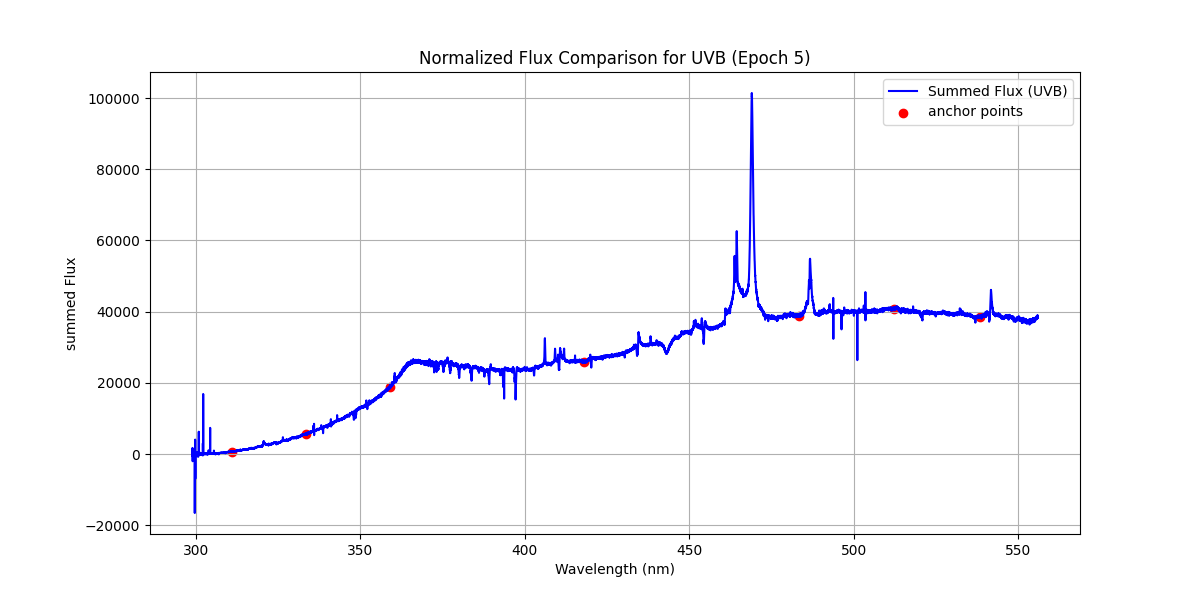

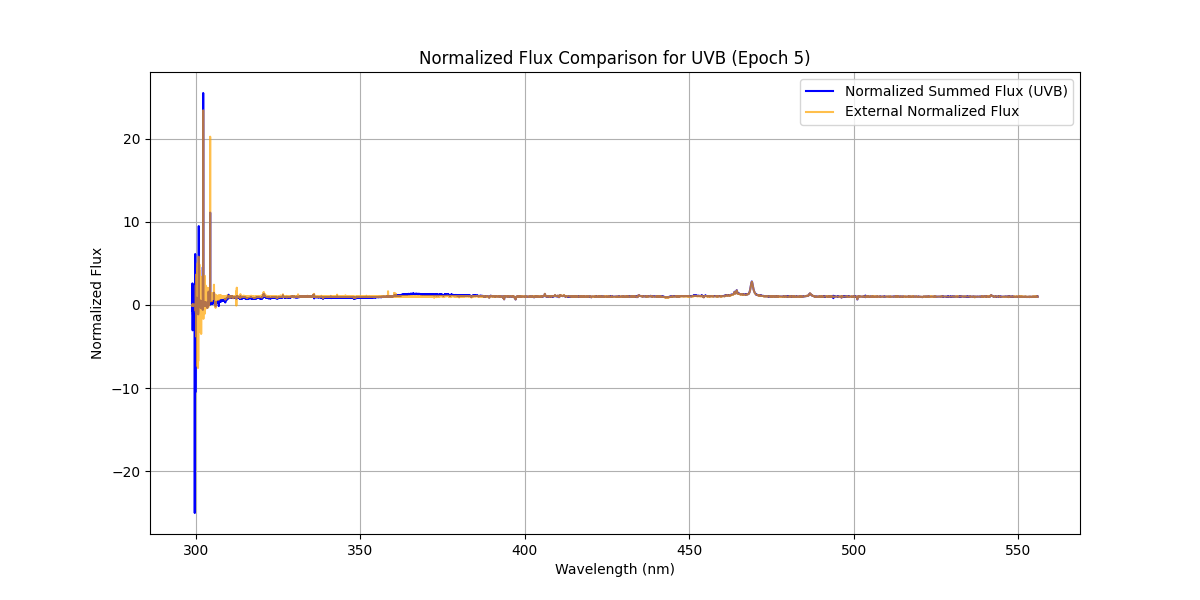

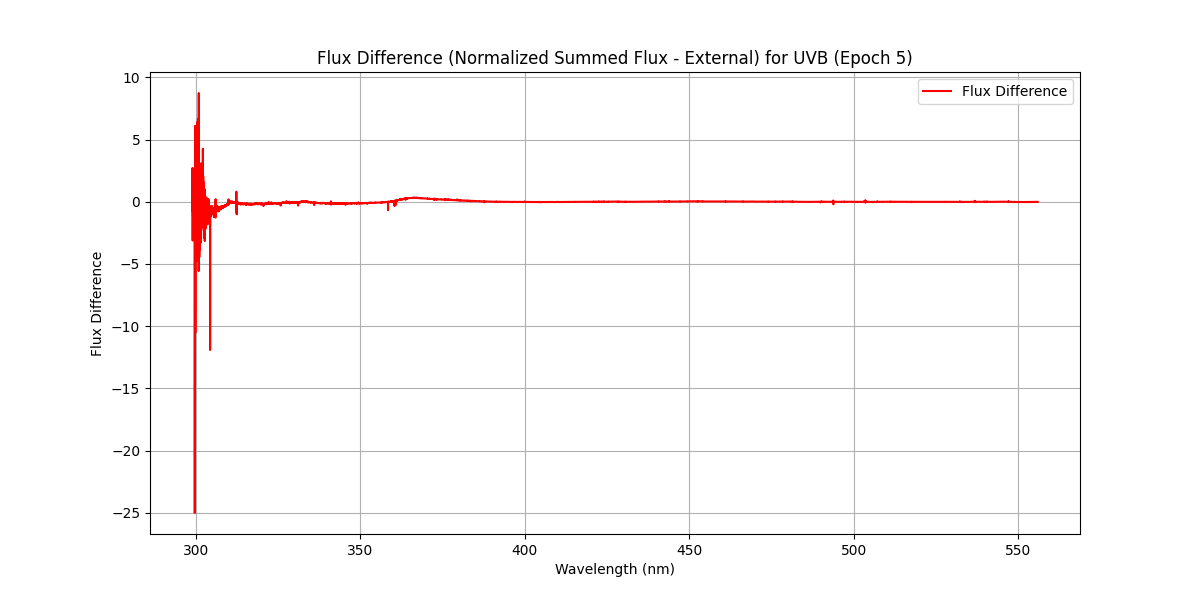

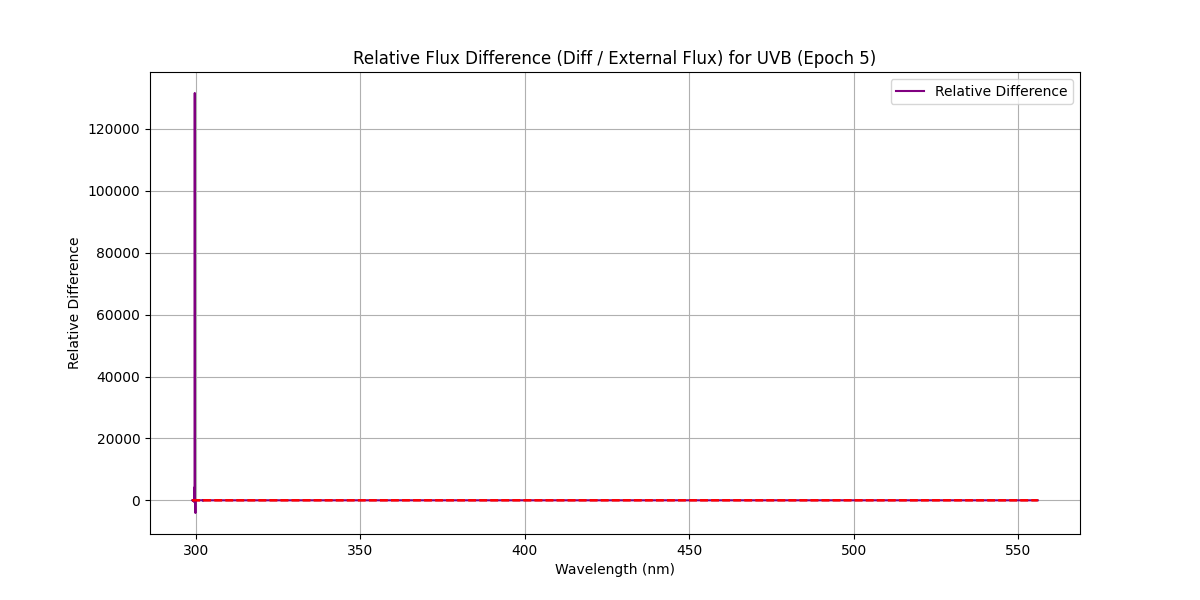

(array([-0.29883982, -0.65214109,  0.00956935, ...,  0.98904851,
         0.98833149,  0.99015689]),
 array([298.92, 298.94, 298.96, ..., 555.94, 555.96, 555.98], dtype='>f8'),
 (-68, -30))

In [5]:
%matplotlib widget
star.clean_flux_and_normalize(epoch_num,'UVB')

In [19]:
%matplotlib widget
star.clean_flux_and_normalize(epoch_num,'VIS')

Data/Brey  58a/epoch4/VIS/2D image/ADP.2021-09-20T20:03:20.595.fits
Data loaded from Data/Brey  58a/epoch4/VIS/2D image/ADP.2021-09-20T20:03:20.595.fits
Data/Brey  58a/epoch4/VIS/ADP.2021-09-20T20_03_20.594.fits
Data loaded from Data/Brey  58a/epoch4/VIS/ADP.2021-09-20T20_03_20.594.fits
The top lines is: -30, and the bottom line is: -68
 anchor_points_in_range: [538.34 567.54 606.62 650.3  747.8  808.78 872.5  892.58 995.48]
found points from wavelngth_2D: [538.34 567.54 606.62 650.3  747.8  808.78 872.5  892.58 995.48]


ValueError: operands could not be broadcast together with shapes (38,) (24318,) 

Data/Brey  83/epoch2/NIR/2D image/ADP.2020-12-07T08:55:14.104.fits
Data loaded from Data/Brey  83/epoch2/NIR/2D image/ADP.2020-12-07T08:55:14.104.fits
Data/Brey  83/epoch2/NIR/ADP.2020-12-07T08_55_14.103.fits
Data loaded from Data/Brey  83/epoch2/NIR/ADP.2020-12-07T08_55_14.103.fits
The top lines is: -24, and the bottom line is: -52
 anchor_points_in_range: [1032.3  1042.62 1068.66 1224.36 1295.94 1534.5  1562.1  1592.1  1626.18
 1660.68 1715.34 1772.04 1987.62 2037.36 2153.76 2187.12 2208.42 2250.
 2305.86 2395.02 2477.4 ]
found points from wavelngth_2D: [1032.3  1042.62 1068.66 1224.36 1295.94 1534.5  1562.1  1592.1  1626.18
 1660.68 1715.34 1772.04 1987.62 2037.36 2153.76 2187.12 2208.42 2250.
 2305.86 2395.02 2477.4 ]


/Users/guyshtainer/Library/CloudStorage/OneDrive-mail.tau.ac.il/תואר שני!/Thesis/Thesis-codes/StarClass.py:1640: RuntimeWarning: invalid value encountered in divide
  relative_difference = flux_difference / external_normalized_flux_band


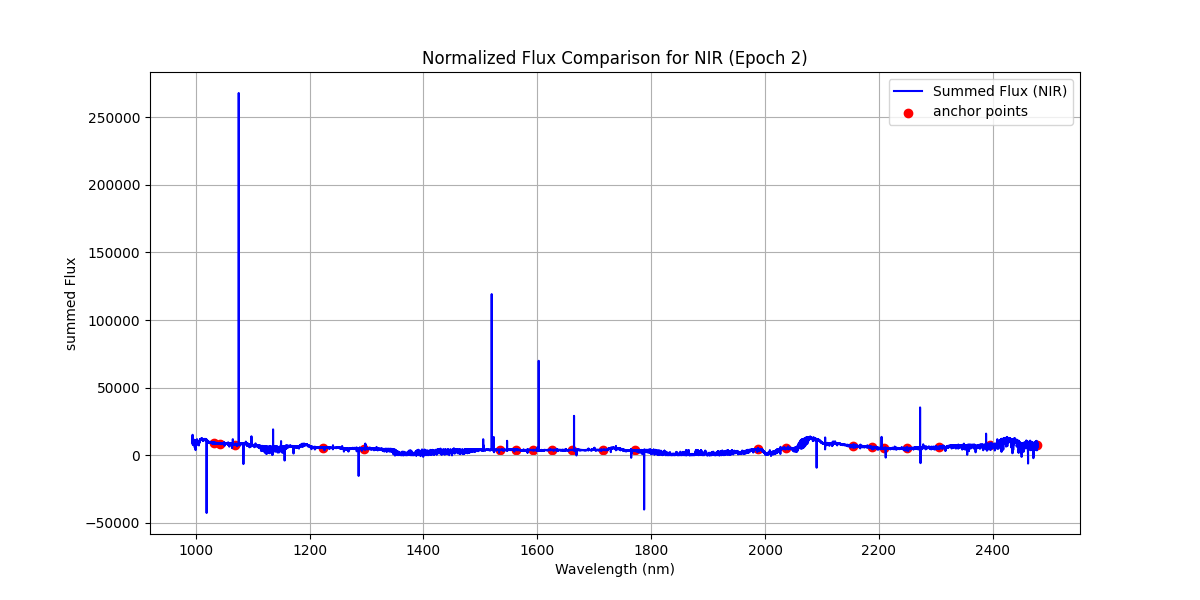

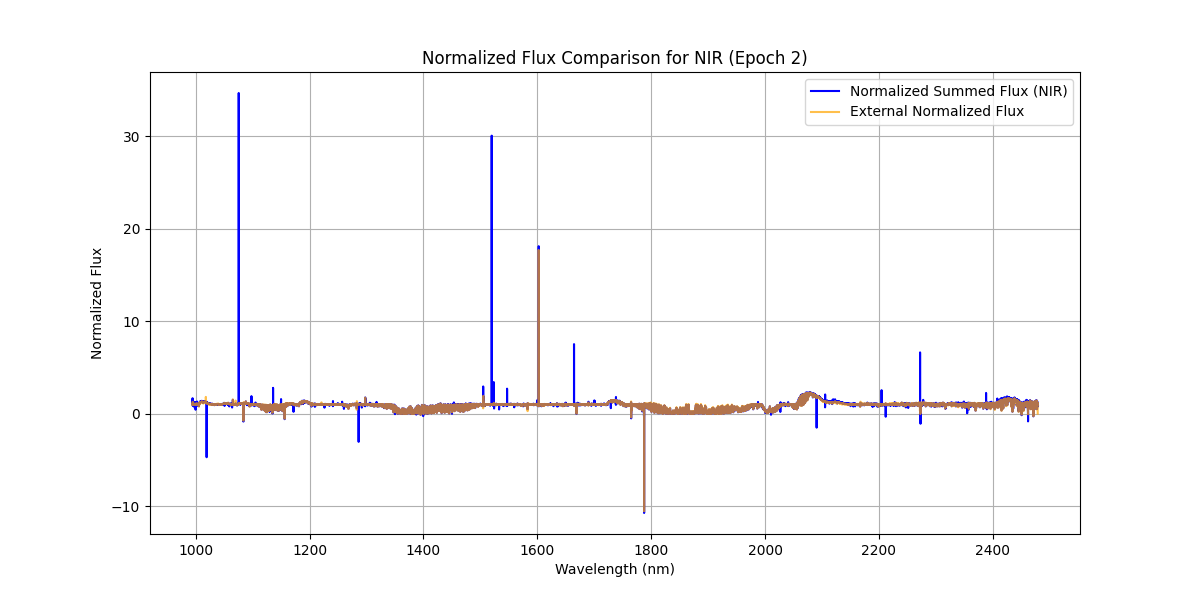

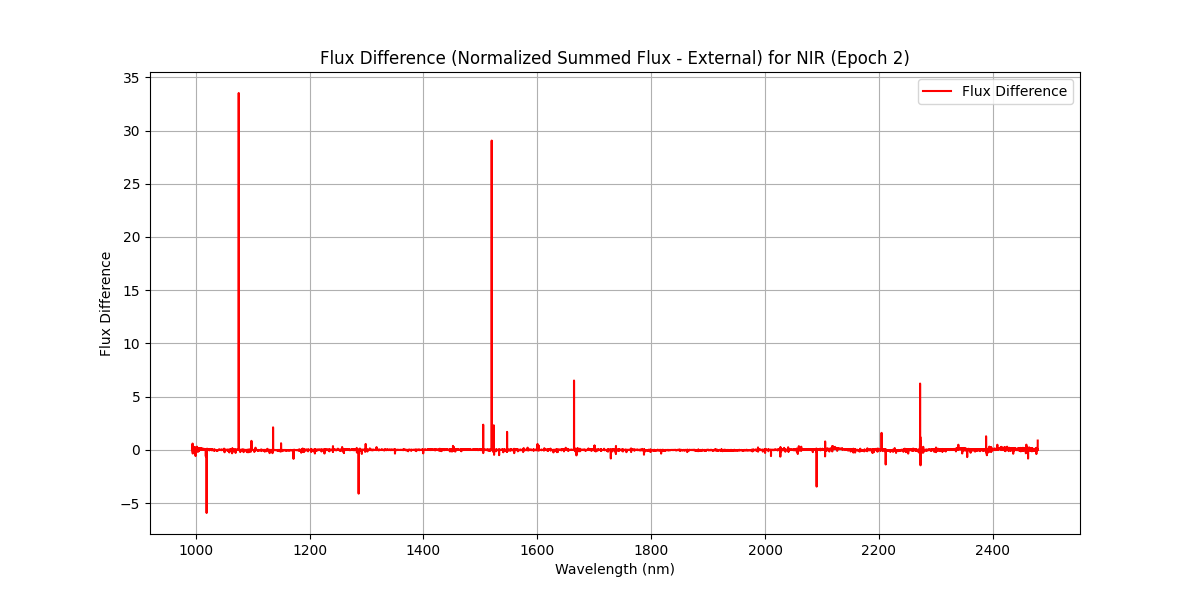

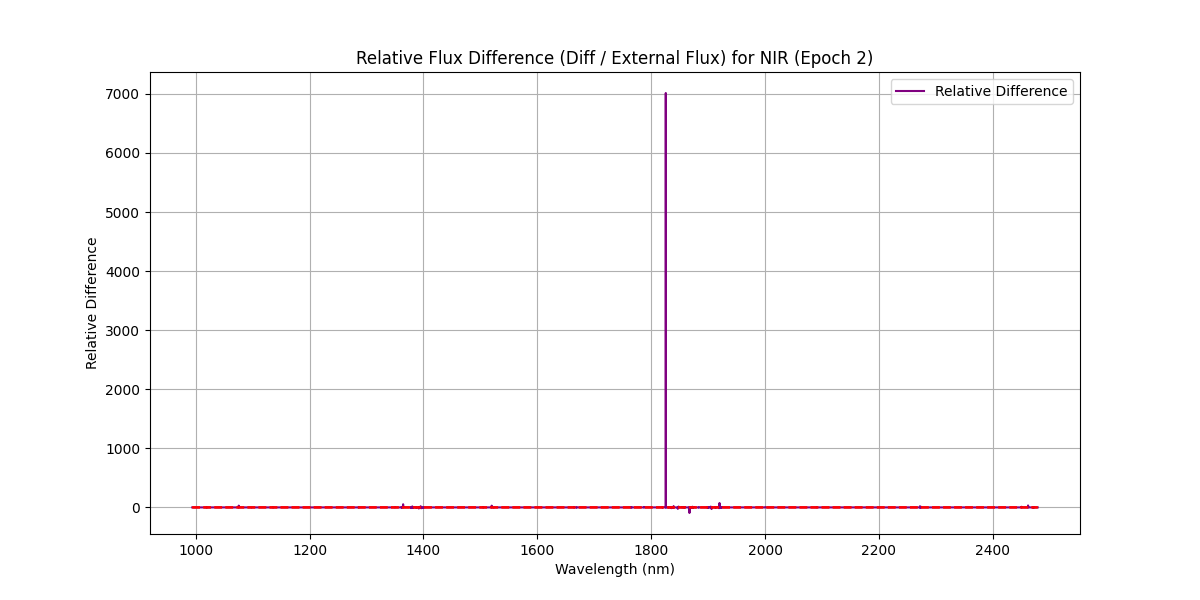

(array([1.16068533, 1.27398004, 1.38727474, ..., 0.91448187, 0.88017143,
        0.87559338]),
 array([ 994.02,  994.04,  994.06, ..., 2478.84, 2478.9 , 2478.96],
       dtype='>f8'),
 (-52, -24))

In [5]:
%matplotlib widget
star.clean_flux_and_normalize(epoch_num,'NIR')

# Calculating RV compared to the first epoch

In [9]:
obs = obsm()
star_names = specs.star_names
star_name = star_names[7]
print(f'We use {star_name}')
star = obs.load_star_instance(star_name)

We use HD  37026


In [8]:
star.list_available_properties()


Available properties for star 'HD  37248':

Epoch      Band       Property                                 Type       Details        
-----------------------------------------------------------------------------------------
1          COMBINED   normalized_flux.npz                      File                      
1          COMBINED   combine_fits_files                       Folder     1 files        
1          COMBINED   norm_anchor_wavelengths.npz              File                      
1          COMBINED   interpolated_flux.npz                    File                      
1          COMBINED   test_method                              Folder     20 files       
1          COMBINED   norm_anchors_results.npz                 File                      
1          NIR        combine_fits_files                       Folder     1 files        
1          NIR        Figures                                  Folder     4 files        
1          NIR        test_method                      

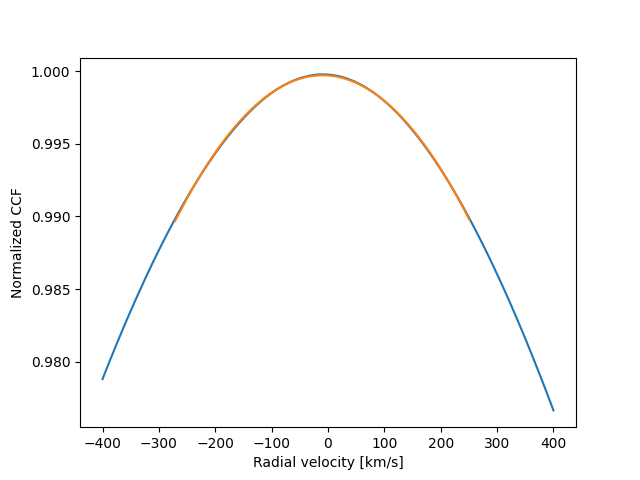

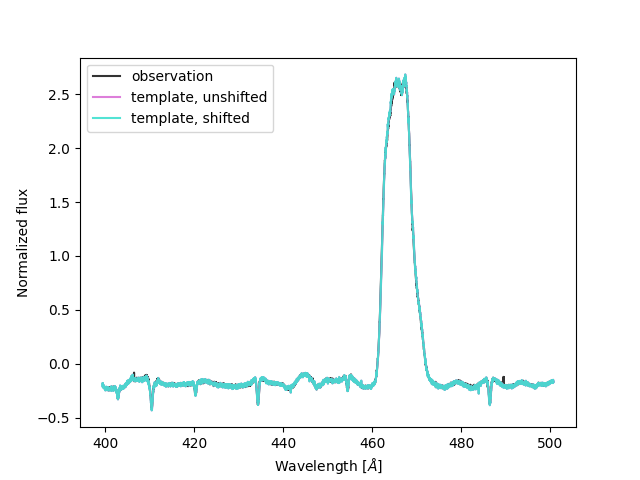

For epoch number 2 the RV is -9.617163385652537, the error is 0.4409679734882085 and the relative error is -0.045852186950059624


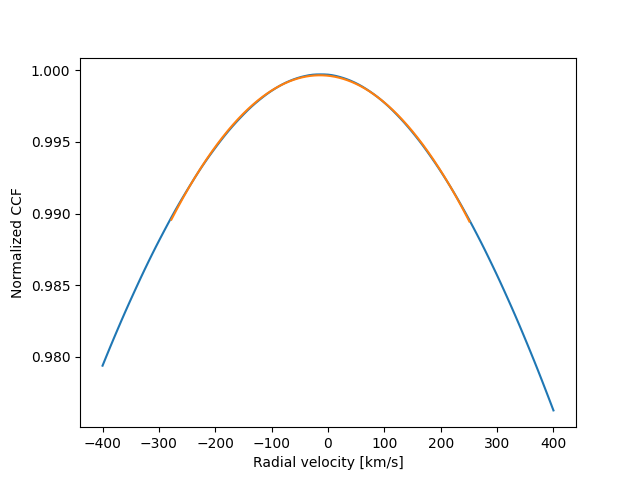

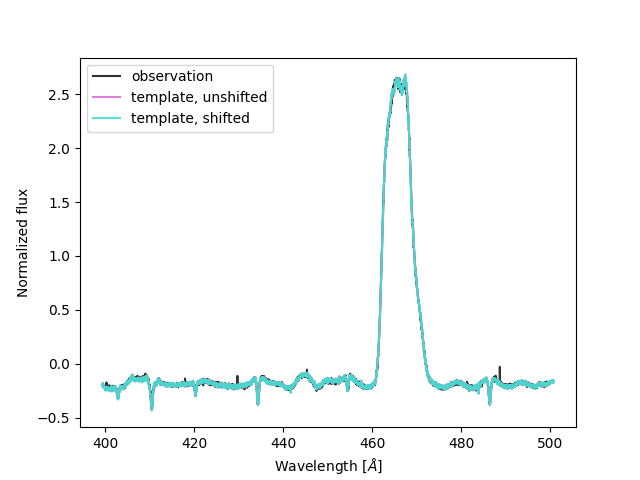

For epoch number 3 the RV is -14.397075575859036, the error is 0.4936524131650488 and the relative error is -0.03428838103710474


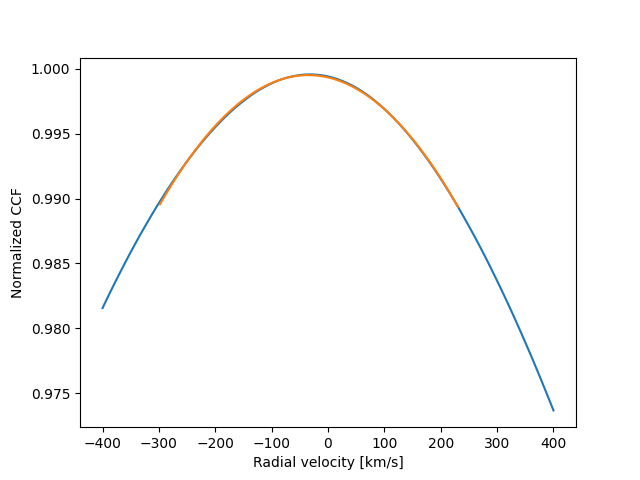

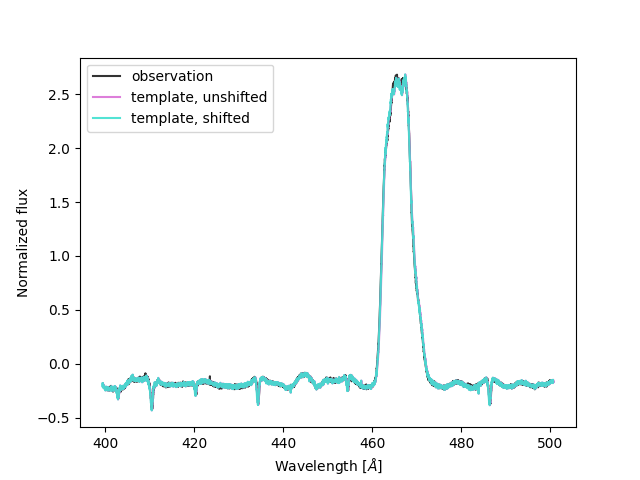

For epoch number 4 the RV is -35.10569500088028, the error is 0.5832369938910682 and the relative error is -0.016613742980346735


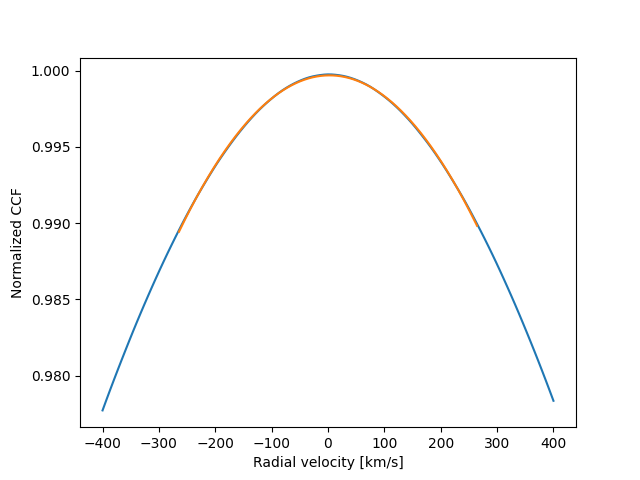

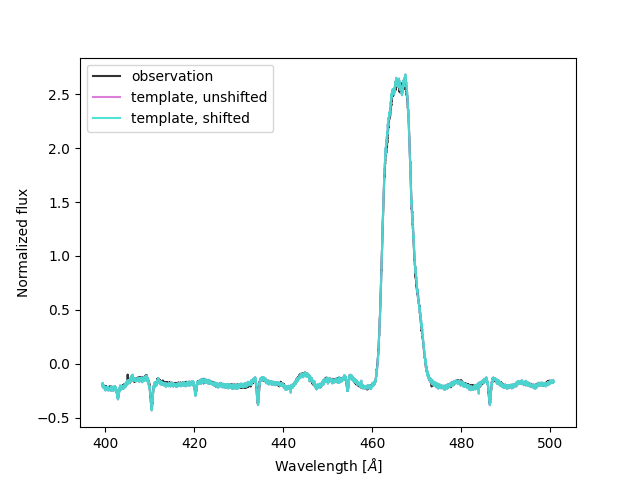

For epoch number 5 the RV is 2.580287989306029, the error is 0.4737019817837422 and the relative error is 0.18358492685583705


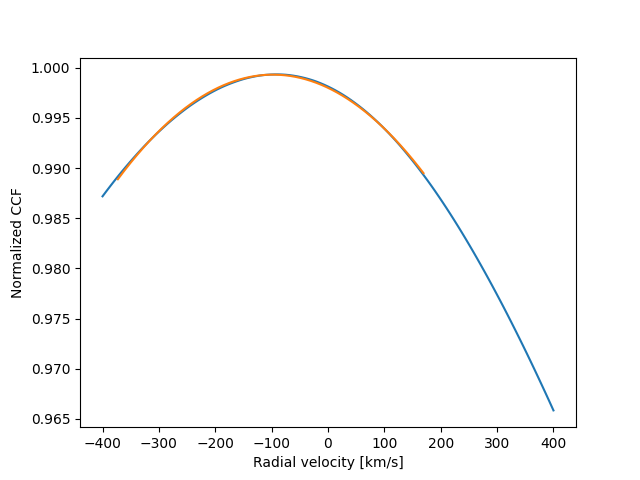

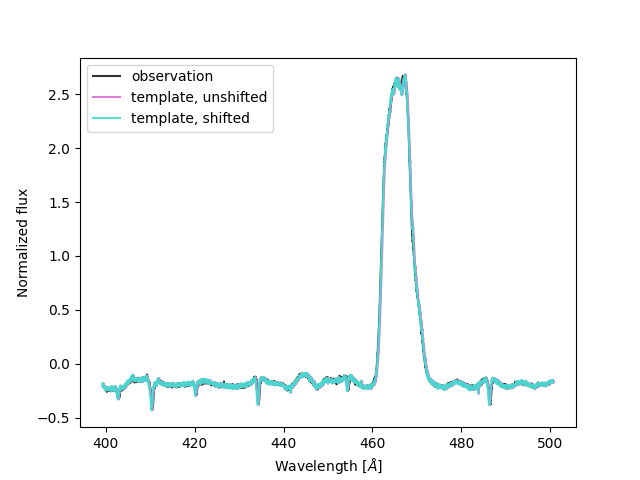

For epoch number 6 the RV is -97.64630428696485, the error is 0.7117559958643859 and the relative error is -0.007289123751910401


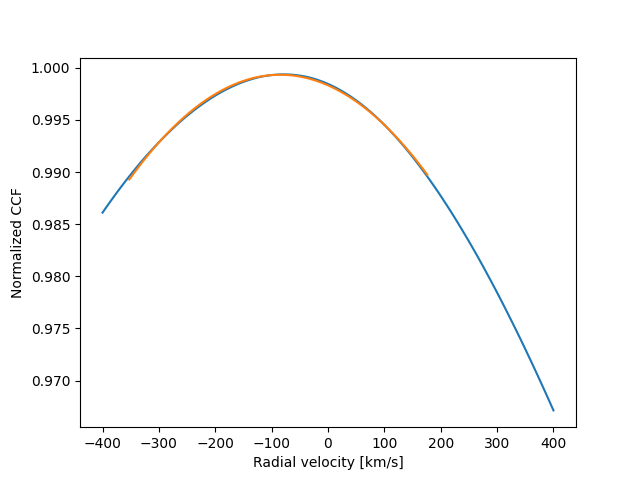

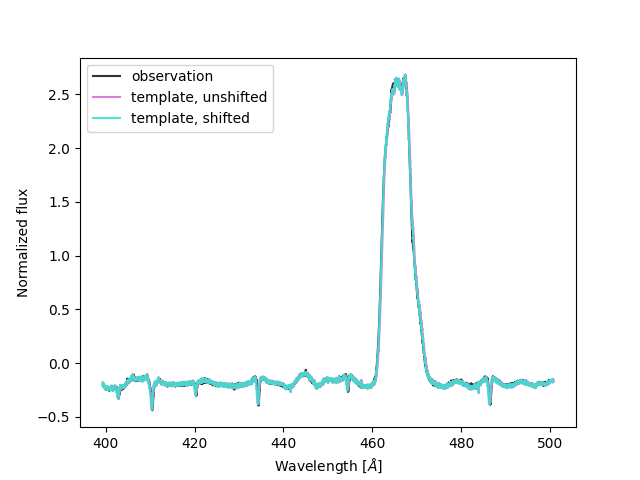

For epoch number 7 the RV is -85.08818884672084, the error is 0.6905421470130991 and the relative error is -0.00811560519001118


In [7]:
%matplotlib widget
template_norm_flux_data = star.load_property('normalized_flux',1,'COMBINED')
initial_template = template_norm_flux_data['normalized_flux']
template_wave = template_norm_flux_data['wavelengths']

for i in range(2,8):
    norm_flux_data = star.load_property('normalized_flux',i,'COMBINED')
    obs_flux = norm_flux_data['normalized_flux']
    obs_wave = norm_flux_data['wavelengths']
    
    CCF = CCFclass(PlotFirst=True,CrossVeloMin=-400,CrossVeloMax=400,Fit_Range_in_fraction=0.99)
    full_RV, full_RV_err = CCF.compute_RV(obs_wave,obs_flux,template_wave,initial_template)
    print(f'For epoch number {i} the RV is {full_RV}, the error is {full_RV_err} and the relative error is {full_RV_err/full_RV}')


In [10]:
%matplotlib widget
star_names = specs.star_names
for star_name in ['Brey  58a']:
    star = obs.load_star_instance(star_name)
    template_norm_flux_data = star.load_property('normalized_flux',1,'COMBINED')
    initial_template = template_norm_flux_data['normalized_flux']
    template_wave = template_norm_flux_data['wavelengths']
    
    for i in range(2,4):
        try:
            norm_flux_data = star.load_property('normalized_flux',i,'COMBINED')
            obs_flux = norm_flux_data['normalized_flux']
            obs_wave = norm_flux_data['wavelengths']
            
            CCF = CCFclass(PlotFirst=False,CrossVeloMin=-400,CrossVeloMax=400,Fit_Range_in_fraction=0.99)
            full_RV, full_RV_err = CCF.compute_RV(obs_wave,obs_flux,template_wave,initial_template)
            tmp_dict = {'full_RV' : full_RV, 'full_RV_err' : full_RV_err}
            star.save_property('RVs',tmp_dict, epoch_number = i,band = 'COMBINED',overwrite = True)
        except Exception as e:
            print(f'Didnt save RVs for star {star_name}, epoch {i}, because {e}') 
        print(f'For epoch number {i} the RV is {full_RV}, the error is {full_RV_err} and the relative error is {full_RV_err/full_RV}')


File exists. Creating a backup before overwriting: Data/Brey  58a/epoch2/COMBINED/output/RVs.npz
Backup created at Backups/overwritten/Brey  58a/epoch2/COMBINED/RVs_backup_27_11_2024__18_40_14.npz
Property saved at Data/Brey  58a/epoch2/COMBINED/output/RVs.npz
For epoch number 2 the RV is -5.463874484159757, the error is 0.2839375648427464 and the relative error is -0.05196634103984377
File exists. Creating a backup before overwriting: Data/Brey  58a/epoch3/COMBINED/output/RVs.npz
Backup created at Backups/overwritten/Brey  58a/epoch3/COMBINED/RVs_backup_27_11_2024__18_40_14.npz
Property saved at Data/Brey  58a/epoch3/COMBINED/output/RVs.npz
For epoch number 3 the RV is -2.068291747120791, the error is 0.28314122873182457 and the relative error is -0.13689617488730846


In [6]:
star = obs.load_star_instance(star_name)
RV = star.load_property('RVs',epoch_num=3,band = 'COMBINED')
print(RV)

{'full_RV': array(11.62044868), 'full_RV_err': array(0.24639165)}


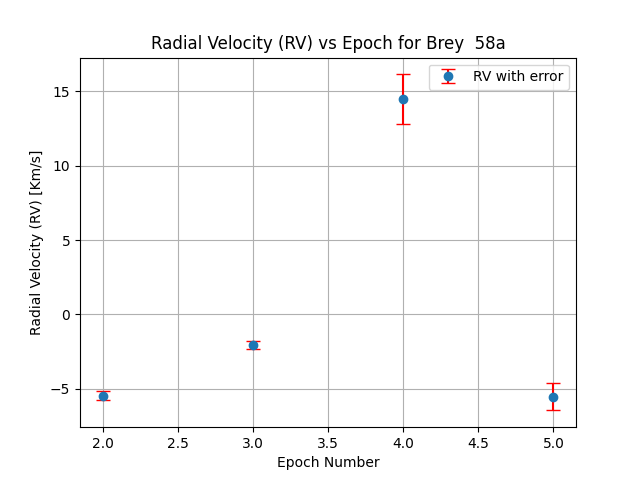

Absolute RV range for Brey  58a: 20.01


In [14]:
import matplotlib.pyplot as plt
import numpy as np

all_stars_info = []
for star_name in ['Brey  58a']:
    star = obs.load_star_instance(star_name)
    RVs = []
    RVs_errs = []
    epochs = []

    # Gather RV data
    for i in range(2, 6):
        try:
            RV = star.load_property('RVs', epoch_num=i, band='COMBINED')
            RVs.append(RV['full_RV'])
            RVs_errs.append(RV['full_RV_err'])
            epochs.append(i)
        except Exception as e:
            print(f"No RV data for star {star_name}, epoch {i}. Skipping.")
            continue

    if len(RVs) > 0:
        # Plot RV vs. epoch with error bars
        RV_range = abs(max(RVs) - min(RVs))
        BAT_ID = star.BAT_ID
        is_binary = "Yes" if RV_range > 20 else "No"

        # Append the star's information to the list
        all_stars_info.append([star_name, BAT_ID, f"{RV_range:.2f}", is_binary])
        plt.figure()
        plt.errorbar(epochs, RVs, yerr=RVs_errs, fmt='o', ecolor='red', capsize=5, label="RV with error")
        plt.title(f"Radial Velocity (RV) vs Epoch for {star_name}")
        plt.xlabel("Epoch Number")
        plt.ylabel("Radial Velocity (RV) [Km/s]")
        plt.grid(True)
        plt.legend()
        plt.show()

        # Calculate and print the absolute range
        RV_range = abs(max(RVs) - min(RVs))
        print(f"Absolute RV range for {star_name}: {RV_range:.2f}")
    else:
        print(f"No RV data available for star {star_name}.")

    

In [17]:
import pandas as pd

# Create a pandas DataFrame from the list
columns = ["Star Name", "BAT_ID", "Absolute RV Range", "Binary?"]
stars_df = pd.DataFrame(all_stars_info, columns=columns)

# Print the table nicely in the console
print("Summary of Stars and Binary Classification:")
# print(stars_df)

# Optionally, display a styled version of the DataFrame
try:
    from IPython.display import display
    styled_table = stars_df.style.set_table_styles(
        [
            {"selector": "thead th", "props": [("background-color", "#D3D3D3"), ("font-weight", "bold")]},
            {"selector": "tbody td", "props": [("border", "1px solid #ddd")]},
        ]
    ).set_caption("Summary of Stars and Binary Classification")
    display(styled_table)
except ImportError:
    print("Install Jupyter/IPython to enable styled DataFrame display.")

Summary of Stars and Binary Classification:


# Combing Spectra

In [3]:
%matplotlib widget
obs = obsm()
star_name = specs.star_names[20]
star = obs.load_star_instance(star_name)
# star.list_available_properties()
# data = star.load_property('aligment_data',3,'COMBINED2')
# star.combine_fits_files(3)

In [15]:
text = ''
for star_name in specs.star_names:
    text += f'{star_name}\n'


print(text)

Brey  70
Brey  83
HD  38029
HD  37248
Brey  95a
MNM2014 LMC195-1
HD  32125
HD  37026
HD 269818
HD  38448
HD  38030
HD  37680
Brey  58a
HD  32228
HD  32257
HD 269888
HD  36156
H2013 LMCe  584
RMC 140
HD  32402
Brey  70a
Brey  16a
Brey  93
Brey  90a
HD 269891



In [3]:
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    epcoh_nums = [int(key[-1]) for key in specs.obs_file_names[star_name].keys()]
    for epoch_num in epcoh_nums:
        star.combine_fits_files(epoch_num=epoch_num, overwrite = True, backup = True, save = True)
        print(f'finished epoch{epoch_num}')

Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits
Data loaded from Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits
Data/Brey  70/epoch1/VIS/ADP.2020-11-13T13_19_45.412.fits
Data loaded from Data/Brey  70/epoch1/VIS/ADP.2020-11-13T13_19_45.412.fits
Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
Data loaded from Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
combined_overlap_indices is [11737 11738 11739 ... 12851 12852 12853]
first the mean_flux_combined was 5.252404150708129e-15 and mean_flux_current is 5.7111491735619096e-15
entered case where mean_flux_combined < mean_flux_current
mean_flux_finer is 5.083104873739044e-15 and mean_flux_coarser is 5.580567866657282e-15
Aligned spectra in overlap between 533.66 and 555.98 Å.
Alignment factor: 1.0873, Alignment score: 1.2965 and Alignment scoreafter interpolation: 0.0192
combined_overlap_indices is [34755 34756 34757 ... 36052 36053 36054]
first the mean_flux_combined was 1.2546583151673514e-15 and

Data/MNM2014 LMC195-1/epoch4/UVB/ADP.2021-09-20T19_54_28.010.fits
Data loaded from Data/MNM2014 LMC195-1/epoch4/UVB/ADP.2021-09-20T19_54_28.010.fits
Data/MNM2014 LMC195-1/epoch4/VIS/ADP.2021-09-20T19_54_28.032.fits
Data loaded from Data/MNM2014 LMC195-1/epoch4/VIS/ADP.2021-09-20T19_54_28.032.fits
Data/MNM2014 LMC195-1/epoch4/NIR/ADP.2021-09-20T19_54_27.947.fits
Data loaded from Data/MNM2014 LMC195-1/epoch4/NIR/ADP.2021-09-20T19_54_27.947.fits


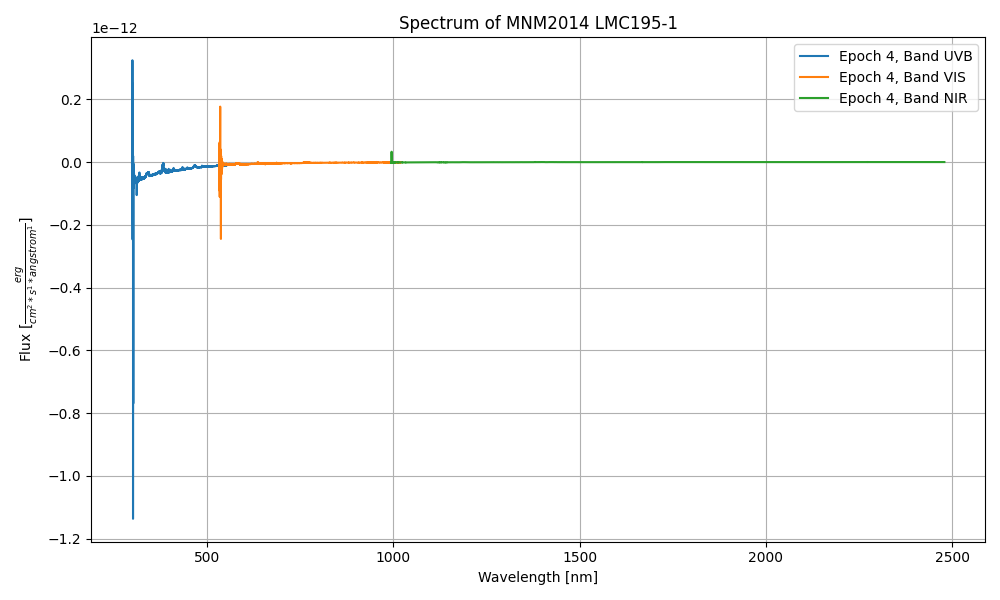

In [10]:
%matplotlib widget
star_name = specs.star_names[5]
star = obs.load_star_instance(star_name)
star.plot_spectra(epoch_nums=4,bands = ['UVB','VIS','NIR'])
# star.plot_spectra(2)
# star.plot_spectra(3)
# star.plot_spectra(4)
# star.plot_spectra(5)
# star.plot_spectra(6)
# star.plot_spectra(7)

# using astroquery to get data on stars

In [31]:
from astroquery.vizier import Vizier

# Initialize Vizier
viz = Vizier()

# List all available catalogs
catalogs = viz.list_catalogs()
print(catalogs)



AttributeError: 'VizierClass' object has no attribute 'list_catalogs'

In [28]:
for key in result.keys():
    print(result[key])

<Table length=1>
  RAJ2000      DEJ2000   
                         
   str12        str12    
------------ ------------
05 38 42.399 -69 06 02.81

In [29]:
for catalog in result:
    print(catalog)

  RAJ2000      DEJ2000   
                         
------------ ------------
05 38 42.399 -69 06 02.81
  RAJ2000       DEJ2000   
                          
------------ -------------
05 38 42.420 -69 06 03.200
  RAJ2000      DEJ2000   
                         
------------ ------------
05 38 57.339 -69 06 05.59
05 38 42.449 -69 06 03.25
  RAJ2000      DEJ2000   
                         
------------ ------------
05 38 28.564 -69 04 32.57
05 38 57.236 -69 07 09.52
05 38 57.247 -69 06 05.49
05 39 03.343 -69 06 34.37
 RAJ2000    DEJ2000  
   deg        deg    
---------- ----------
 84.676648 -69.100934
 84.738142 -69.101950
 RAJ2000   DEJ2000 
   deg       deg   
--------- ---------
 84.73831 -69.10158
RAJ2000  DEJ2000 
  deg      deg   
-------- --------
 84.6690 -69.0996
 84.6697 -69.0994
 84.6760 -69.0988
 84.6766 -69.1040
 84.6774 -69.1009
 84.6785 -69.0952
 84.6792 -69.1007
 84.6793 -69.1009
 84.6795 -69.1011
 84.6801 -69.1008
 84.6849 -69.0987
 84.6901 -69.0966
 84.6916 -69.106

In [30]:
print(result['B/vsx/vsx'])

 RAJ2000   DEJ2000     Sp   
   deg       deg            
--------- --------- --------
 84.67332 -69.08707    WC+WN
 84.67648 -69.08283    O7Iaf
 84.67663 -69.10083 WN5hn+OB
 84.68358 -69.09881      WN6
 84.73778 -69.10157      WN7


In [27]:
result = viz.query_object("Brey 83")
print(result)

TableList with 277 tables:
	'0:I/193/ppm2' with 2 column(s) and 1 row(s) 
	'1:I/195/catalog' with 2 column(s) and 1 row(s) 
	'2:I/197A/tic' with 2 column(s) and 2 row(s) 
	'3:I/221/lmc' with 2 column(s) and 4 row(s) 
	'4:I/252/out' with 2 column(s) and 2 row(s) 
	'5:I/254/out' with 2 column(s) and 1 row(s) 
	'6:I/274/ccdm' with 2 column(s) and 13 row(s) 
	'7:I/275/ac2002' with 2 column(s) and 21 row(s) 
	'8:I/276/supplem' with 2 column(s) and 1 row(s) 
	'9:I/280B/ascc' with 2 column(s) and 3 row(s) 
	'10:I/284/out' with 2 column(s) and 8 row(s) 
	'11:I/297/out' with 2 column(s) and 50 row(s) 
	'12:I/305/out' with 2 column(s) and 5 row(s) 
	'13:I/312/sample' with 2 column(s) and 19 row(s) 
	'14:I/317/sample' with 2 column(s) and 20 row(s) 
	'15:I/320/spm4' with 2 column(s) and 50 row(s) 
	'16:I/322A/out' with 2 column(s) and 50 row(s) 
	'17:I/324/igsl3' with 2 column(s) and 50 row(s) 
	'18:I/339/hsoy' with 2 column(s) and 19 row(s) 
	'19:I/340/ucac5' with 2 column(s) and 50 row(s) 
	'20

In [21]:
# List all available catalogs
catalogs = viz.list_catalogs()
print(catalogs)


AttributeError: 'VizierClass' object has no attribute 'list_catalogs'

# Extracting data form fits files 

In [5]:
obs = obsm()
star_name = specs.star_names[0]
star = obs.load_star_instance(star_name)

In [10]:
fits_file = star.load_observation(1,'NIR')
wave = fits_file.data['WAVE'][0]
reduced_flux = fits_file.data['FLUX_REDUCED'][0]
print(len(wave))
print(len(reduced_flux))
print(reduced_flux)

Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits
Data loaded from Data/Brey  70/epoch1/NIR/ADP.2020-11-13T13_19_45.726.fits
24750
24750
[2261.75756836 3470.08886719 2000.34106445 ...  935.94451904  493.60571289
 3229.68554688]


In [7]:
fits_file.print_file_info()

Opened FITS file: Data/Brey  70/epoch1/COMBINED/combined_bands.fits
Number of HDUs: 2
HDU 0: PrimaryHDU
------------------------------------------------------------
Header:
SIMPLE = True
BITPIX = 8
NAXIS = 0
EXTEND = True
------------------------------------------------------------
Image Data Shape: None
Image Data Type: None
HDU 1: BinTableHDU
------------------------------------------------------------
Header:
XTENSION = BINTABLE
BITPIX = 8
NAXIS = 2
NAXIS1 = 3139292
NAXIS2 = 1
PCOUNT = 0
GCOUNT = 1
TFIELDS = 7
TTYPE1 = WAVE
TFORM1 = 60371D
TUNIT1 = nm
TTYPE2 = FLUX
TFORM2 = 60371D
TUNIT2 = erg cm**(-2) s**(-1) angstrom**(-1)
TTYPE3 = ERR
TFORM3 = 60371D
TUNIT3 = erg cm**(-2) s**(-1) angstrom**(-1)
TTYPE4 = QUAL
TFORM4 = 60371J
TTYPE5 = SNR
TFORM5 = 60371D
TTYPE6 = FLUX_REDUCED
TFORM6 = 60371D
TUNIT6 = adu
TTYPE7 = ERR_REDUCED
TFORM7 = 60371D
TUNIT7 = adu
DISPELEM = COMBINED
NELEM = 60371
------------------------------------------------------------
Table Columns:
Name: WAVE, Format: 